In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import mlflow
import mlflow.sklearn

# set random seed for reproducibility
np.random.seed(42)

# load dataset
data = pd.read_csv('data/train.csv')

# suffle the dataset
data = data.sample(frac=1).reset_index(drop=True)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      517754 non-null  int64  
 1   road_type               517754 non-null  object 
 2   num_lanes               517754 non-null  int64  
 3   curvature               517754 non-null  float64
 4   speed_limit             517754 non-null  int64  
 5   lighting                517754 non-null  object 
 6   weather                 517754 non-null  object 
 7   road_signs_present      517754 non-null  bool   
 8   public_road             517754 non-null  bool   
 9   time_of_day             517754 non-null  object 
 10  holiday                 517754 non-null  bool   
 11  school_season           517754 non-null  bool   
 12  num_reported_accidents  517754 non-null  int64  
 13  accident_risk           517754 non-null  float64
dtypes: bool(4), float64(

<Axes: xlabel='accident_risk', ylabel='curvature'>

/usr/local/anaconda3/envs/ml_kaggle/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/anaconda3/envs/ml_kaggle/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


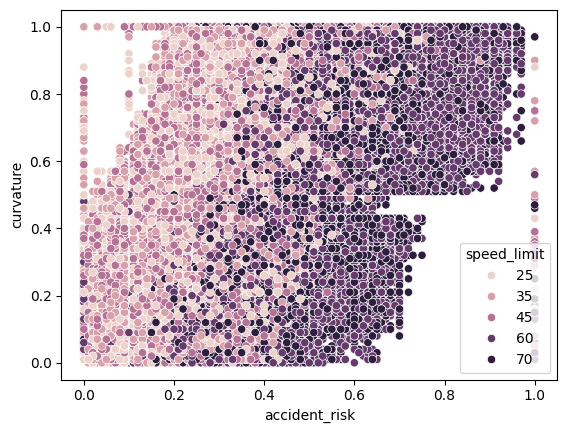

In [9]:
sns.scatterplot(data, x="accident_risk", y="curvature", hue="speed_limit")


<Axes: xlabel='accident_risk', ylabel='curvature'>

/usr/local/anaconda3/envs/ml_kaggle/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/anaconda3/envs/ml_kaggle/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


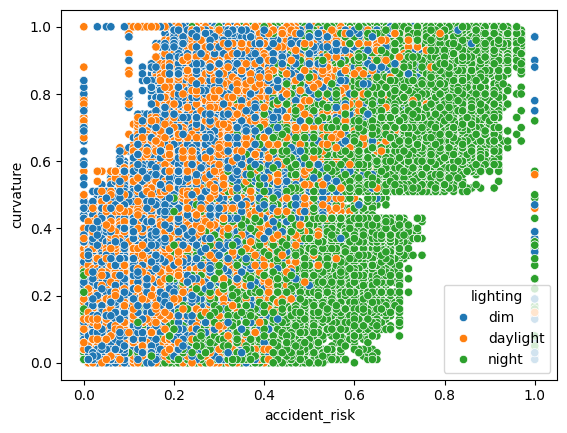

In [10]:
sns.scatterplot(data, x="accident_risk", y="curvature", hue="lighting")


<Axes: xlabel='accident_risk', ylabel='num_lanes'>

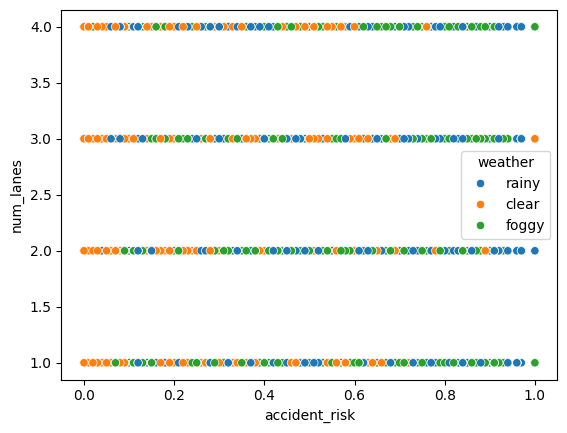

In [29]:
sns.scatterplot(data, x="accident_risk", y="num_lanes", hue="weather")


<Axes: xlabel='accident_risk', ylabel='curvature'>

/usr/local/anaconda3/envs/ml_kaggle/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/anaconda3/envs/ml_kaggle/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


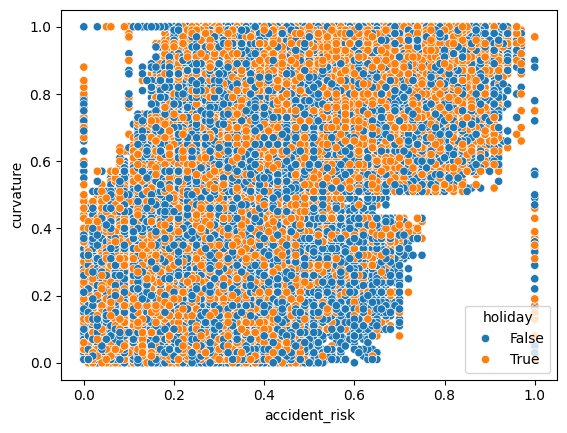

In [31]:
sns.scatterplot(data, x="accident_risk", y="curvature", hue="holiday")


<Axes: xlabel='accident_risk', ylabel='curvature'>

/usr/local/anaconda3/envs/ml_kaggle/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/anaconda3/envs/ml_kaggle/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


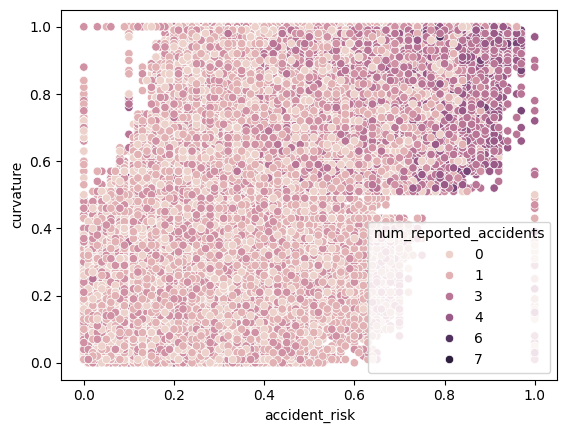

In [12]:
sns.scatterplot(data, x="accident_risk", y="curvature", hue="num_reported_accidents")


<Axes: xlabel='curvature', ylabel='speed_limit'>

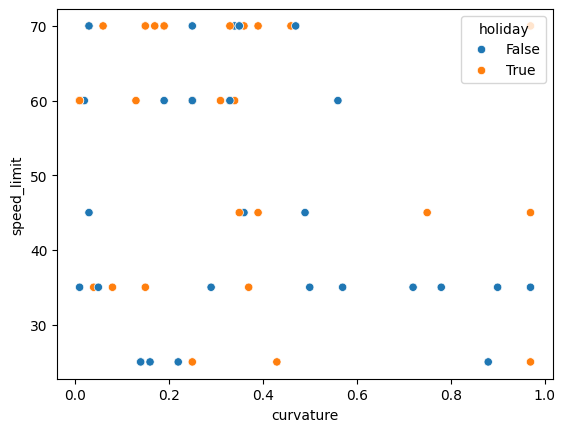

In [32]:
sns.scatterplot(data[data["accident_risk"]==1], x="curvature", y="speed_limit", hue="holiday")


In [28]:
data[(data["accident_risk"]==1)  & (data["curvature"]<0.6)]

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
18487,401825,urban,4,0.06,70,dim,clear,False,False,morning,True,False,3,1.0
26715,211913,highway,3,0.25,60,night,clear,False,False,afternoon,False,False,2,1.0
34666,385171,highway,3,0.14,25,dim,rainy,False,True,afternoon,False,False,3,1.0
39538,80915,urban,1,0.34,70,daylight,rainy,False,True,evening,False,False,1,1.0
40971,301288,highway,4,0.15,70,daylight,rainy,False,False,afternoon,True,False,2,1.0
41695,352095,urban,1,0.14,25,daylight,rainy,False,True,morning,False,True,3,1.0
60017,10396,urban,2,0.01,60,night,foggy,False,True,afternoon,True,False,1,1.0
65795,95186,urban,3,0.17,70,night,foggy,False,False,morning,True,False,1,1.0
75717,8897,rural,1,0.43,25,night,rainy,False,True,morning,True,True,1,1.0
77069,294155,rural,4,0.13,60,dim,rainy,True,False,morning,True,False,0,1.0
